In [ ]:
# tensorflow와 tf.keras를 임포트한다
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 패션 MNIST 데이터는 keras의 데이터셋에 있으며, 이를 학습용, 테스트 데이터로 구분하자
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape)  # 학습 이미지의 형태와 레이블을 출력한다
print(train_labels)
print(test_images.shape)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


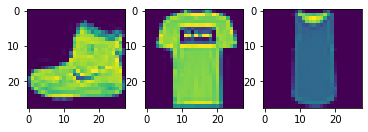

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.imshow(train_images[0])       # 첫 번째 훈련용 데이터
ax2.imshow(train_images[1])       # 두 번째 훈련용 데이터
ax3.imshow(train_images[2])       # 세 번째 훈련용 데이터
plt.show()

In [ ]:
print(train_labels[:3])

[9 0 0]


In [ ]:
# 0-255 구간의 픽셀을 정규화한다
train_images, test_images = train_images / 255, test_images / 255
# 순차 심층 신경망 모델을 만들자
model = keras.models.Sequential( [
   keras.layers.Flatten(input_shape=(28, 28)),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(128, activation= 'relu'),
   keras.layers.Dense(32, activation= 'relu'),
   keras.layers.Dense(10, activation= 'softmax'),
])

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size=64,
                    epochs=10, validation_split=0.25)

Epoch 1/10
704/704 [==============================] - 5s 6ms/step - loss: 0.6017 - accuracy: 0.7895 - val_loss: 0.4532 - val_accuracy: 0.8363
Epoch 2/10
704/704 [==============================] - 5s 8ms/step - loss: 0.4410 - accuracy: 0.8407 - val_loss: 0.3980 - val_accuracy: 0.8575
Epoch 3/10
704/704 [==============================] - 3s 4ms/step - loss: 0.3991 - accuracy: 0.8546 - val_loss: 0.3713 - val_accuracy: 0.8657
Epoch 4/10
704/704 [==============================] - 3s 4ms/step - loss: 0.3714 - accuracy: 0.8654 - val_loss: 0.3661 - val_accuracy: 0.8685
Epoch 5/10
704/704 [==============================] - 3s 5ms/step - loss: 0.3538 - accuracy: 0.8683 - val_loss: 0.3429 - val_accuracy: 0.8769
Epoch 6/10
704/704 [==============================] - 4s 6ms/step - loss: 0.3398 - accuracy: 0.8736 - val_loss: 0.3441 - val_accuracy: 0.8743
Epoch 7/10
704/704 [==============================] - 3s 4ms/step - loss: 0.3324 - accuracy: 0.8773 - val_loss: 0.3426 - val_accuracy: 0.8769
Epoch 

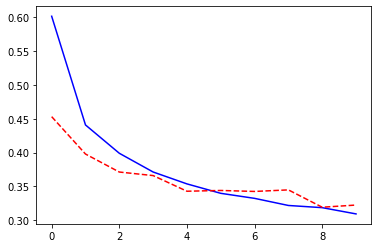

In [ ]:
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r--')

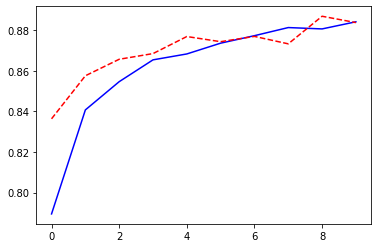

In [ ]:
plt.plot(history.history['accuracy'], 'b-')
plt.plot(history.history['val_accuracy'], 'r--')

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.3472 - accuracy: 0.8729 - 433ms/epoch - 1ms/step
테스트 정확도: 0.8729000091552734


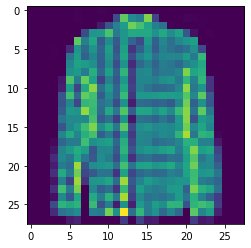

In [ ]:
randIdx = np.random.randint(0, 1000)
plt.imshow(test_images[randIdx])

In [ ]:
print(test_images[randIdx].shape)
new_image = test_images[randIdx][np.newaxis, :, :]
print(new_image.shape)

yhat = model.predict(new_image)
print(yhat.round(3))    # 소수점 아래 세 자리 정확도로 살펴보자

(28, 28)
(1, 28, 28)
[[0.001 0.    0.014 0.    0.064 0.    0.92  0.    0.001 0.   ]]


In [ ]:
yhat = np.argmax( model.predict( test_images[randIdx][np.newaxis, :, :]) )
yhat

6

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
print(class_names[yhat])

Shirt


In [ ]:
def plot_images(images, labels, images_per_row=5):
  n_images = len(images)
  n_rows = (n_images-1) // images_per_row + 1
  fig, ax = plt.subplots(n_rows, images_per_row, 
                         figsize = (images_per_row * 2, n_rows * 2))
  for i in range(n_rows):
      for j in range(images_per_row):
          if i*images_per_row + j >= n_images: break
          img_idx = i*images_per_row + j
          a_image = images[img_idx].reshape(28,28)
          if n_rows>1: axis = ax[i, j]
          else: axis = ax[j]
          axis.get_xaxis().set_visible(False)
          axis.get_yaxis().set_visible(False)
          label = class_names[labels[img_idx]]
          axis.set_title(label)
          axis.imshow(a_image, interpolation='nearest')

[9 2 1 1 6 1 4 6 5 7 4 5 8 3 4 1 2 2 8 0 2 5 7 5 1]


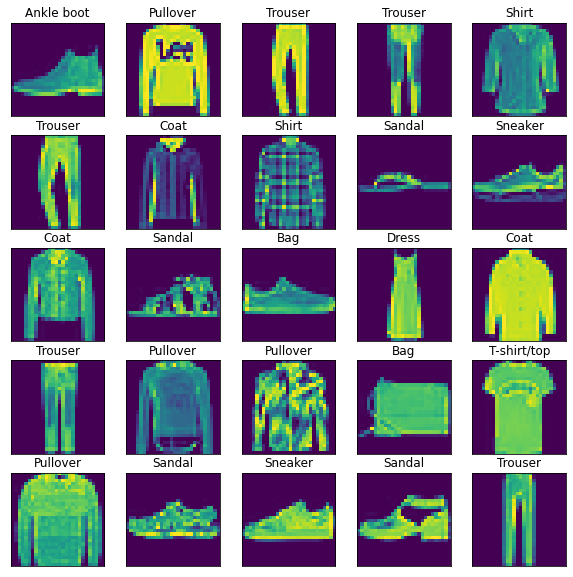

In [ ]:
images = test_images[:25]
predictions = np.argmax(model.predict(images), axis=1)
print(predictions)
plot_images(images, predictions, images_per_row = 5)